Load data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('application_train.csv')
data.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
11608,113524,0,Cash loans,F,Y,Y,0,207000.0,254700.0,14751.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
data.shape

(307511, 122)

Make a copy so that we can always go back to the original data.  

In [4]:
df = data.copy()
df = df.rename(columns=lambda x: x.lower())
df.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
16841,119641,0,Cash loans,F,N,N,0,292500.0,1078200.0,31522.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


We decided to keep only those few columns that are strongly correlated with the target.  We had decided on the following features/columns.  

In [5]:
col_num = ['ext_source_3',
           'ext_source_2',
           'ext_source_1',
           'days_birth',
           'region_rating_client_w_city',
           'days_last_phone_change',
           'days_id_publish',
           'reg_city_not_work_city',
           'flag_emp_phone',
           'reg_city_not_live_city',
           'flag_document_3',
           'floorsmax_avg'
          ]

col_cat = ['name_education_type',
           'name_income_type']

Ensure that the column names are spelled correctly.  

continuous

In [6]:
sum(col in df.columns for col in col_num) == len(col_num)

True

discrete

In [7]:
sum(col in df.columns for col in col_cat) == len(col_cat)

True

And these are all we need ... for now.  

In [8]:
cols = col_num + col_cat + ['target']
len(cols)

15

In [9]:
df = df[cols]
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
274521,0.554947,0.468396,NaN,-15889,2,-2397.0,-4839,0,1,0,0,0.0417,Secondary / secondary special,Working,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
ext_source_3                   246546 non-null float64
ext_source_2                   306851 non-null float64
ext_source_1                   134133 non-null float64
days_birth                     307511 non-null int64
region_rating_client_w_city    307511 non-null int64
days_last_phone_change         307510 non-null float64
days_id_publish                307511 non-null int64
reg_city_not_work_city         307511 non-null int64
flag_emp_phone                 307511 non-null int64
reg_city_not_live_city         307511 non-null int64
flag_document_3                307511 non-null int64
floorsmax_avg                  154491 non-null float64
name_education_type            307511 non-null object
name_income_type               307511 non-null object
target                         307511 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 35.2+ MB


Looks like some of the columns have missing values.  (We already knew this!)  Let's just collect the names in a list.  HINT: They are all continuous!  

In [11]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

5

For simplicity, let's just replace the missing values by the means of their corresponding columns.  

In [12]:
for col in has_null:
    df[col].fillna(df[col].mean(), inplace=True)

Let's just check that there is no missing value.  

In [13]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

0

Modeling time!!  

### OneHotEncoding, first. 

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder()

In [16]:
X = df.copy()
X.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
51218,0.510853,0.609812,0.50213,-19433,2,0.0,-2955,1,1,1,0,0.226282,Secondary / secondary special,Working,0


In [17]:
X.drop(col_cat, axis=1, inplace=True)
X.shape

(307511, 13)

In [18]:
X = X.join(pd.get_dummies(
    df[['name_education_type', 
        'name_income_type']]))

In [19]:
X.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working
285361,0.340906,0.55561,0.50213,-21482,2,-1267.0,-4784,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [20]:
X.shape

(307511, 26)

In [21]:
y = X['target']
X = X.drop('target', axis=1)

Scaling  

In [22]:
from sklearn.preprocessing import scale

In [23]:
X = scale(X)

In [24]:
X.shape

(307511, 25)

In [25]:
X = pd.DataFrame(X)
X.sample()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
4925,-1.736111,-0.545411,-2.124802,1.029792,-0.062699,1.158505,1.845179,1.827367,0.468697,3.433973,...,-0.112095,-1.565416,-0.005703,1.81489,-0.004032,-0.468573,-0.275564,-0.007651,-0.008459,-1.03319


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### Logistic regression!

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9206274877077968

In [30]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[70738,    38],
       [ 6064,    38]])

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

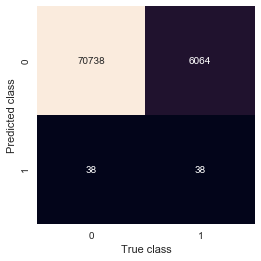

In [32]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, ypred)

0.5028452806194322

Consider only complete rows

In [34]:
cols_UPPER = [col.upper() for col in cols]
df_conservative = data[cols_UPPER].dropna()
df_conservative.shape

(58021, 15)

In [35]:
y = df_conservative['TARGET']

In [36]:
X = df_conservative.drop('TARGET', axis=1)

In [37]:
X.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [38]:
col_cat_UPPER = [col.upper() for col in col_cat]
X.drop(col_cat_UPPER, axis=1, inplace=True)
X.shape

(58021, 12)

In [39]:
X = X.join(pd.get_dummies(
    df_conservative[col_cat_UPPER]))

X.shape

(58021, 24)

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [41]:
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [42]:
accuracy_score(ytest, ypred)

0.9365779677374879

In [43]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[13586,     0],
       [  920,     0]])

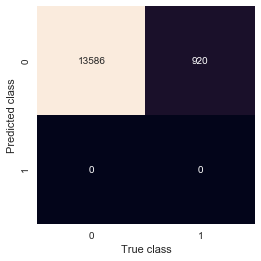

In [44]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [45]:
roc_auc_score(ytest, ypred)

0.5

Consider only complete rows and subsampling

In [46]:
df_conservative['TARGET'].value_counts()

0    54297
1     3724
Name: TARGET, dtype: int64

In [47]:
subsample = df_conservative[df_conservative['TARGET'] == 0].sample(3724)
subsample.sample()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,FLOORSMAX_AVG,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,TARGET
267481,0.614414,0.687459,0.364833,-9075,2,-467.0,-805,0,1,0,1,0.3333,Incomplete higher,Commercial associate,0


In [48]:
subsample = subsample.append(df_conservative[df_conservative['TARGET'] == 1])
subsample.shape

(7448, 15)

In [49]:
y = subsample['TARGET']

In [50]:
X = subsample.drop('TARGET', axis=1)

In [51]:
col_cat_UPPER = [col.upper() for col in col_cat]
X.drop(col_cat_UPPER, axis=1, inplace=True)
X.shape

(7448, 12)

In [52]:
X = X.join(pd.get_dummies(
    subsample[col_cat_UPPER], drop_first=True))

X.shape

(7448, 19)

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

#### Logistic regression

In [54]:
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [55]:
accuracy_score(ytest, ypred)

0.6933404940923737

In [56]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[646, 263],
       [308, 645]])

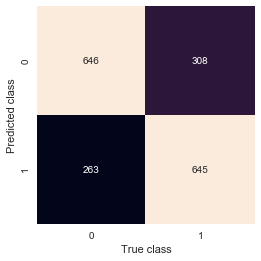

In [57]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [58]:
roc_auc_score(ytest, ypred)

0.6937405702794833

This is much better!

#### GNB

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)

In [60]:
accuracy_score(ytest, ypred)

0.6578947368421053

In [61]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[566, 343],
       [294, 659]])

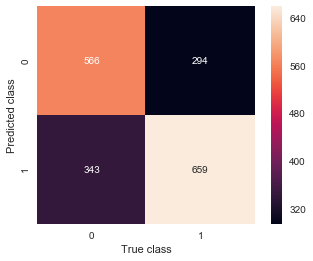

In [62]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [63]:
roc_auc_score(ytest, ypred)

0.6570813954427972

#### RF

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [65]:
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [66]:
accuracy_score(ytest, ypred)

0.6557465091299678

In [67]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[668, 241],
       [400, 553]])

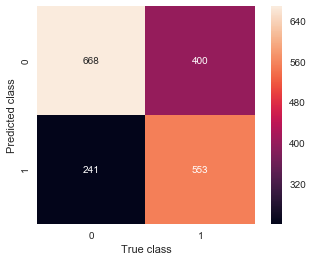

In [68]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [69]:
roc_auc_score(ytest, ypred)

0.6575731550070012

adaboost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)

In [71]:
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)

In [72]:
accuracy_score(ytest, ypred)

0.6761546723952739

In [73]:
confusion_matrix(ytest, ypred)

array([[640, 269],
       [334, 619]])

In [74]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.66      0.70      0.68       909
          1       0.70      0.65      0.67       953

avg / total       0.68      0.68      0.68      1862



In [75]:
roc_auc_score(ytest, ypred)

0.6767991069831012

gradient boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [77]:
gbc.fit(Xtrain, ytrain)
ypred = gbc.predict(Xtest)

In [78]:
accuracy_score(ytest, ypred)

0.7040816326530612

In [79]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.69      0.73      0.71       909
          1       0.72      0.68      0.70       953

avg / total       0.71      0.70      0.70      1862



In [80]:
roc_auc_score(ytest, ypred)

0.7046400862541659

In [81]:
print(gbc.feature_importances_)

[0.17873602 0.17246297 0.17596813 0.15004141 0.01488415 0.07238864
 0.13390027 0.00127211 0.         0.0021029  0.01464294 0.04466172
 0.0044294  0.00036735 0.         0.01566277 0.00084197 0.01452043
 0.00311682]


In [82]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': gbc.feature_importances_})

fi = fi.sort_values(by='importance')
fi

,importance,variable
14,0.000000,NAME_EDUCATION_TYPE_Lower secondary
8,0.000000,FLAG_EMP_PHONE
13,0.000367,NAME_EDUCATION_TYPE_Incomplete higher
16,0.000842,NAME_INCOME_TYPE_Pensioner
7,0.001272,REG_CITY_NOT_WORK_CITY
9,0.002103,REG_CITY_NOT_LIVE_CITY
18,0.003117,NAME_INCOME_TYPE_Working
12,0.004429,NAME_EDUCATION_TYPE_Higher education
17,0.014520,NAME_INCOME_TYPE_State servant
10,0.014643,FLAG_DOCUMENT_3


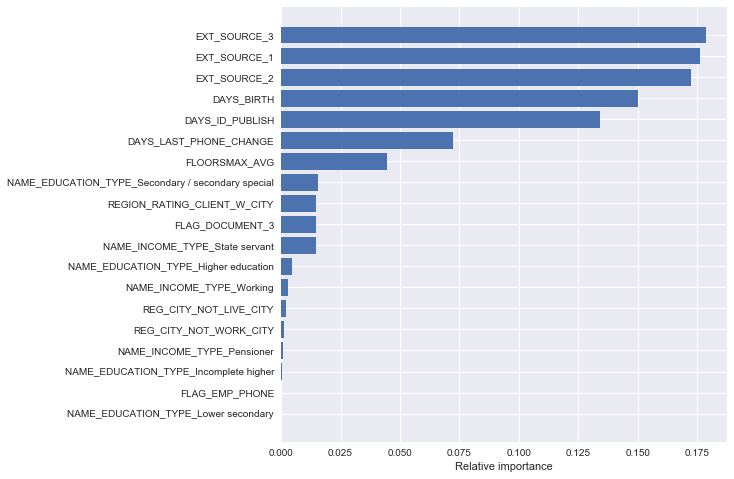

In [83]:
plt.figure(figsize=(8,8))
plt.barh(range(fi.shape[0]), fi['importance'])
plt.yticks(range(fi.shape[0]), fi['variable'])
plt.xlabel('Relative importance');